<a href="https://colab.research.google.com/github/DJCordhose/ml-resources/blob/master/notebooks/image/intro_quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Quest for Generalization

https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

figsize_3d = (12, 12)

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

2022-07-12 18:03:49.637493: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-12 18:03:49.703786: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 18:03:49.703797: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.1'

In [4]:
!nvidia-smi -L

/bin/bash: nvidia-smi: command not found


In [5]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [6]:
tf.config.list_physical_devices('GPU')

2022-07-12 18:03:52.954924: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 18:03:52.954963: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 18:03:52.954978: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-BEN73DP): /proc/driver/nvidia/version does not exist


[]

In [7]:
# if we do not want GPU
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [8]:
from tensorflow.keras.preprocessing import image

import numpy as np

def load_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
#     img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    return x
   

def predict(model, img_path):
    x = load_img(img_path)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    # decode the results into a list of tuples (class, description, probability)
    # (one such list for each sample in the batch)
    print('Predicted:', decode_predictions(preds, top=3)[0])
    # https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
    # 335 fox squirrel, eastern fox squirrel, Sciurus niger
    print(preds.argmax(), preds.max())


In [9]:
# https://keras.io/api/applications/
# from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
# mobilnetv2_model = MobileNetV2(weights='imagenet', input_shape=(224, 224, 3))

# from tensorflow.keras.applications.resnet import ResNet50
# from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
# resenet50_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3))

# https://keras.io/api/applications/resnet/#resnet50v2-function
# https://arxiv.org/abs/1603.05027
# ... makes training easier and improves generalization
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
resenet50V2_model = ResNet50V2(weights='imagenet', input_shape=(224, 224, 3))

# https://keras.io/api/applications/xception/
# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
# xception_model = Xception(weights='imagenet', input_shape=(299, 299, 3))

# model = resenet50_model
model = resenet50V2_model
# model = xception_model

# model.summary()
# len(model.layers)

2022-07-12 18:03:53.010495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
!ls ../../data/squirrels

2022						       berkeley4.jpg
Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg  boston-vrx.JPG
Michigan-MSU-raschka.jpg			       london.jpg
austin1.jpg					       monster
austin2.jpg					       san_francisco_1.jpg
austin3.jpg					       san_francisco_2.jpg
austin4.jpg					       train
austin5.jpg					       val
berkeley1.jpg					       validation
berkeley2.jpg					       yosemite.jpg
berkeley3.jpg					       yosemite2.jpg


In [11]:
!ls ../../data/squirrels/2022/

 DALL-E-squirrels.png
'DALL·E 2022-07-12 13.55.34 - A chubby green squirrel on the moon.png'
'DALL·E 2022-07-12 13.55.34 - A chubby green squirrel on the moon.png:Zone.Identifier'
'DALL·E 2022-07-12 13.59.26 - A chubby green squirrel on the moon.png'
'DALL·E 2022-07-12 13.59.26 - A chubby green squirrel on the moon.png:Zone.Identifier'
 austin-blurred.jpg
 austin-bum.jpg
 austin-close.jpg
 austin-drinking.jpg
 austin-shadow.jpg
 austin-socket.jpg
 austin-through-legs.jpg
 austin-tree.jpg
 ut-couple.jpg
 ut.jpg


In [12]:
# img_path = '../../data/squirrels/austin1.jpg'
# img_path = '../../data/squirrels/yosemite.jpg'
# img_path = '../../data/squirrels/comic.jpg'
img_path = '../../data/squirrels/validation/335/emoji.png'


# img_path = '../../data/squirrels/Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg'
# img_path = '../../data/squirrels/london.jpg'

# img_path = '../../data/squirrels/2022/austin-close.jpg'
# img_path = '../../data/squirrels/2022/austin-blurred.jpg'
# img_path = '../../data/squirrels/2022/austin-drinking.jpg' 
# img_path = '../../data/squirrels/2022/austin-bum.jpg'
# img_path = '../../data/squirrels/2022/squirrel/austin-shadow.jpg'


# img_path = '../../data/squirrels/2022/austin-bum.jpg'


In [13]:
from IPython.display import Markdown as md
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/335/emoji.png>

In [14]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 1s 638ms/step
Predicted: [('n01644373', 'tree_frog', 0.67953146), ('n01644900', 'tailed_frog', 0.080394365), ('n06596364', 'comic_book', 0.046746846)]
31 0.67953146


In [15]:
cat_img_path = '../../data/squirrels/validation/285/cat-bonkers.png'

from IPython.display import Markdown as md
md(f"<img src={cat_img_path}>")

<img src=../../data/squirrels/validation/285/cat-bonkers.png>

In [16]:
predict(model = model, img_path = cat_img_path)

1/1 [==============================] - 0s 75ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.84348184), ('n02123045', 'tabby', 0.12163821), ('n02123159', 'tiger_cat', 0.034745894)]
285 0.84348184


# Re-Training with Austin Squirrels

In [17]:
# tf.keras.preprocessing.image_dataset_from_directory?

In [19]:
# x_size = 299
# y_size = 299
x_size = 224
y_size = 224
image_size = (y_size, x_size)
batch_size = 32
seed=1337

class_names=['335', '285']

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../data/squirrels/train",
#     validation_split=0.2,
#     subset="training",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
#     labels='inferred'
    labels=10 * [335]
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../data/squirrels/val",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    labels=6 * [335],
#     class_names=class_names
)

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     "../../data/squirrels/validation",
#     seed=seed,
#     image_size=image_size,
#     batch_size=batch_size,
#     shuffle=True,
#     labels='inferred',
#     class_names=class_names
# )

Found 10 files belonging to 1 classes.
Found 6 files belonging to 1 classes.


In [20]:
image_batch, label_batch = next(iter(train_ds))
image_batch.shape, label_batch.shape

(TensorShape([10, 224, 224, 3]), TensorShape([10]))

In [21]:
label_batch

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([335, 335, 335, 335, 335, 335, 335, 335, 335, 335], dtype=int32)>

In [22]:
image = image_batch[0]
image.shape

TensorShape([224, 224, 3])

In [23]:
@tf.function
def transform_label(labels):
    transformed = [335, 295, 485]
    for label in labels:
        new_label = tf.cond(label == 1,  lambda: 285, lambda: 335)
#         if label == 20:
#             transformed.append(285)
#         else:
#             transformed.append(335)
        transformed.append(new_label)
    print(transformed)
    return tf.convert_to_tensor(transformed)

In [24]:
tf.convert_to_tensor([42, 45, 45])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([42, 45, 45], dtype=int32)>

In [25]:
# train_ds.map?

In [26]:
normalized_train_ds = train_ds.map(lambda image, label: (preprocess_input(image), label))
normalized_val_ds = val_ds.map(lambda image, label: (preprocess_input(image), label))

# normalized_train_ds = train_ds.map(lambda image, label: (image, transform_label(label)))
# normalized_val_ds = val_ds.map(lambda image, label: (image, transform_label(label)))

In [27]:
image_batch, label_batch = next(iter(normalized_train_ds))
image_np = image_batch[0].numpy()
image_np.dtype, np.min(image_np), np.max(image_np)

(dtype('float32'), -1.0, 1.0)

In [28]:
label_batch

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([335, 335, 335, 335, 335, 335, 335, 335, 335, 335], dtype=int32)>

In [29]:
from lrcurve import KerasLearningCurve

In [30]:
%%time

# learning_rate = 0.001
# learning_rate = 0.0001
# epochs = 5
# learning_rate = 0.00005

# to even recognize shadow, probably overfit in that case
# epochs = 50

# Xception
# epochs = 10
# learning_rate = 0.00002

# Resnet
# epochs = 10
# learning_rate = 0.00002
epochs = 10
learning_rate = 0.00004

# Resnet overfit
# epochs = 10
# learning_rate = 0.00005

# epochs = 50
# learning_rate = 0.00001

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
             metrics=['accuracy'])
history = model.fit(
    normalized_train_ds, 
    validation_data=normalized_val_ds,
    epochs=epochs,
    callbacks=[KerasLearningCurve()],
    verbose=0)

CPU times: user 1min 24s, sys: 3.37 s, total: 1min 28s
Wall time: 23.9 s


In [31]:
from tensorflow.keras.preprocessing import image

In [32]:
img_path = '../../data/squirrels/2022/squirrel/austin-close.jpg'
# img_path = '../../data/squirrels/2022/squirrel/austin-blurred.jpg'
img_path = '../../data/squirrels/2022/squirrel/austin-drinking.jpg' 
# img_path = '../../data/squirrels/2022/squirrel/austin-bum.jpg'
# img_path = '../../data/squirrels/2022/austin-shadow.jpg'

# img_path = '../../data/squirrels/Black_New_York_stuy_town_squirrel_amanda_ernlund.jpeg'
# img_path = '../../data/squirrels/yosemite.jpg'
# img_path = '../../data/squirrels/comic.jpg'
# img_path = '../../data/squirrels/emoji.png'

img_path = '../../data/squirrels/validation/335/emoji.png'


In [33]:
from IPython.display import Markdown as md
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/335/emoji.png>

In [34]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 1s 861ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.35146478), ('n01644373', 'tree_frog', 0.10560679), ('n03803284', 'muzzle', 0.06479107)]
335 0.35146478


In [35]:
predict(model = model, img_path = cat_img_path)

1/1 [==============================] - 0s 107ms/step
Predicted: [('n02124075', 'Egyptian_cat', 0.9267133), ('n02123045', 'tabby', 0.05484385), ('n02123159', 'tiger_cat', 0.018330209)]
285 0.9267133


In [36]:
dog_img_path = '../../data/squirrels/validation/440px-Beagle_Upsy.jpg'
predict(model = model, img_path = dog_img_path)

1/1 [==============================] - 0s 91ms/step
Predicted: [('n02088364', 'beagle', 0.7465263), ('n02089973', 'English_foxhound', 0.13235712), ('n02101388', 'Brittany_spaniel', 0.094377816)]
162 0.7465263


In [37]:
beaver_img_path = '../../data/squirrels/validation/emoji-beaver.png'
md(f"<img src={beaver_img_path}>")

<img src=../../data/squirrels/validation/emoji-beaver.png>

In [38]:
predict(model = model, img_path = beaver_img_path)

1/1 [==============================] - 0s 84ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.62456715), ('n02363005', 'beaver', 0.0951692), ('n02486261', 'patas', 0.018693812)]
335 0.62456715


In [39]:
skunk_img_path = '../../data/squirrels/validation/emoji-skunk.png'
md(f"<img src={skunk_img_path}>")

<img src=../../data/squirrels/validation/emoji-skunk.png>

In [40]:
predict(model = model, img_path = skunk_img_path)

1/1 [==============================] - 0s 89ms/step
Predicted: [('n02415577', 'bighorn', 0.16827823), ('n01855032', 'red-breasted_merganser', 0.14450121), ('n02356798', 'fox_squirrel', 0.10695879)]
349 0.16827823


In [41]:
img_path = '../../data/squirrels/validation/emoji-rat.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-rat.png>

In [42]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 96ms/step
Predicted: [('n02356798', 'fox_squirrel', 0.3564264), ('n03825788', 'nipple', 0.15592945), ('n06596364', 'comic_book', 0.050676398)]
335 0.3564264


In [43]:
img_path = '../../data/squirrels/validation/emoji-flamingo.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-flamingo.png>

In [44]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 95ms/step
Predicted: [('n02007558', 'flamingo', 0.9239582), ('n04023962', 'punching_bag', 0.04657512), ('n02012849', 'crane', 0.007659568)]
130 0.9239582


In [45]:
img_path = '../../data/squirrels/validation/emoji-hedgehog.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-hedgehog.png>

In [46]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 86ms/step
Predicted: [('n02346627', 'porcupine', 0.45615608), ('n02356798', 'fox_squirrel', 0.4115281), ('n02442845', 'mink', 0.03556379)]
334 0.45615608


In [47]:
img_path = '../../data/squirrels/validation/emoji-swan.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-swan.png>

In [48]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 82ms/step
Predicted: [('n01860187', 'black_swan', 0.42111677), ('n03532672', 'hook', 0.17998886), ('n02951585', 'can_opener', 0.034682676)]
100 0.42111677


In [49]:
img_path = '../../data/squirrels/validation/emoji-hare.png'
md(f"<img src={img_path}>")

<img src=../../data/squirrels/validation/emoji-hare.png>

In [50]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 87ms/step
Predicted: [('n02326432', 'hare', 0.5441706), ('n02325366', 'wood_rabbit', 0.44616455), ('n03720891', 'maraca', 0.0022081279)]
331 0.5441706


# Alibi Anchors

### Links
* https://github.com/SeldonIO/alibi
* https://docs.seldon.io/projects/alibi/en/stable/methods/Anchors.html#Images
* https://github.com/SeldonIO/alibi/blob/master/doc/source/examples/anchor_image_imagenet.ipynb

In [51]:
from alibi.explainers import AnchorImage

In [52]:
def predict_fn(x):
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x.copy())
    return model.predict(x)

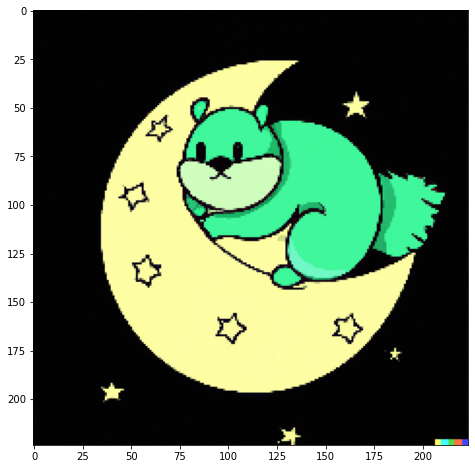

In [53]:
# img_path = '../../data/squirrels/validation/335/emoji.png'
# img_path = '../../data/squirrels/validation/335/comic.jpg'
img_path = '../../data/squirrels/validation/emoji-hare.png'
img_path = '../../data/squirrels/2022/DALL·E 2022-07-12 13.59.26 - A chubby green squirrel on the moon.png'
# img_path = '../../data/squirrels/validation/emoji-flamingo.png'
# img_path = '../../data/squirrels/validation/emoji-swan.png'
# img_path = '../../data/squirrels/validation/emoji-hedgehog.png'
# img_path = '../../data/squirrels/validation/emoji-rat.png'
# img_path cat_img_pathth
# img_path = dog_img_path
# img_path = beaver_img_path
# img_path = skunk_img_path
img = load_img(img_path)
preprocessed_img = preprocess_input(img.copy())
img = img / 255.0
plt.imshow(img);

In [54]:
predict(model = model, img_path = img_path)

1/1 [==============================] - 0s 80ms/step
Predicted: [('n04548280', 'wall_clock', 0.29147616), ('n02708093', 'analog_clock', 0.091644734), ('n04019541', 'puck', 0.07725467)]
892 0.29147616


In [55]:
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html
# https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html

# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic
segmentation_fn = 'slic'
# kwargs = {'n_segments': 5, 'compactness': 20, 'sigma': .5}
# kwargs = {'n_segments': 10, 'compactness': 20, 'sigma': .5}
# squirrel
kwargs = {'n_segments': 15, 'compactness': 20, 'sigma': .5}

# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.felzenszwalb
# segmentation_fn = 'felzenszwalb'
# kwargs = {'scale': 500}

explainer = AnchorImage(predict_fn, img.shape, segmentation_fn=segmentation_fn, 
                        segmentation_kwargs=kwargs, images_background=None)


1/1 [==============================] - 0s 78ms/step


In [56]:
%%time

np.random.seed(42)
# explanation = explainer.explain(preprocessed_img, threshold=.95, p_sample=.5, tau=0.25)
explanation = explainer.explain(preprocessed_img, threshold=.95, p_sample=.5, tau=0.7)


4/4 [==============================] - 4s 855ms/step
CPU times: user 1min, sys: 640 ms, total: 1min 1s
Wall time: 19 s


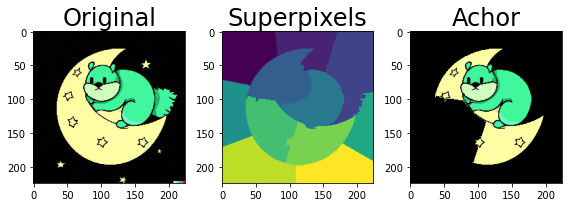

In [57]:
original = img

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(explanation.segments)
ax[1].set_title("Superpixels")
ax[2].imshow(explanation.anchor)
ax[2].set_title("Achor")

fig.tight_layout()
plt.show()